Importing data sheet from local PC

In [ ]:
from google.colab import files

Choosing the file

In [ ]:
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling (1).csv


Loading the dataset, Listing all the available columns and printing head of the dataset to look at

In [ ]:
import pandas as pd

churn = pd.read_csv('Churn_Modelling.csv')

print(churn.columns)
print(churn.head(10))

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   
5          6    15574012       Chu          645     Spain    Male   44   
6          7    15592531  Bartlett          822    France    Male   50   
7          8    15656148    Obinna          376   Germany  Female   29   
8          9    15792365        He          501    France    Male   44   
9         10    15592389        H? 

**Data Cleaning and Preparation**

As columns 'RowNumber' and 'CustomerId' are both containing unique values so that each row can be identified uniquely. Having 2 different columns for same reasons doesn't look good, therefore dropping 'RowNumber' Column because it has no other purpose but just that, while 'CustomerId' can be used for operations of bank as well.

In [ ]:
del churn['RowNumber']

listing the Column again and checking the datatypes of all columns

In [ ]:
print(churn.columns)
print(churn.info())

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null

Next, as the columns 'HasCrCard' and 'Exited' contains only 1s and 0s represting yes and no respectively. Which seems an inappropriate datataype for these columns, therefore changing their datatypes to Boolean so they can more appropriate values like True or False.

and the column 'IsActiveMember' along 'HasCrCard' and 'Exited' are of type bool but they contain 1s and 0s, therefore changing their values to True for 1 and False for 0.

In [ ]:
churn['HasCrCard'] = churn['HasCrCard'].astype('bool')
churn['Exited'] = churn['Exited'].astype('bool')

churn['IsActiveMember'] = churn['IsActiveMember'].replace({1: True, 0: False})
churn['HasCrCard'] = churn['HasCrCard'].replace({1: True, 0: False})
churn['Exited'] = churn['Exited'].replace({1: True, 0: False})

<ipython-input-26-3644010891>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  churn['IsActiveMember'] = churn['IsActiveMember'].replace({1: True, 0: False})


Now checking the datatypes again and printing head of the dataset to see the effects



In [ ]:
print(churn.info())
print(churn.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  bool   
 10  IsActiveMember   10000 non-null  bool   
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  bool   
dtypes: bool(3), float64(2), int64(5), object(3)
memory usage: 810.7+ KB
None
   CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure  \
0    15634602  Hargrave          619    France  Femal

As the 'Surname' Column contains some names equal to 'H?' which is an invalid name and removing such rows will save analysis fro being skewed.

In [ ]:
print("Total Rows of 'SurName' Column: ", churn['Surname'].count())

churn = churn[churn['Surname'] != "H?"]

print("Rows of 'SurName' Column after dropping invalid valued rows: ", churn['Surname'].count())

Total Rows of 'SurName' Column:  10000
Rows of 'SurName' Column after dropping invalid valued rows:  9981


**Encoding Categorical (Gender and Geography) features**

This created dummies for each category in this case categories are 'Gender' and 'Geography'

In [63]:
encoded_values = pd.get_dummies(churn, columns = ['Gender', 'Geography'], drop_first = True)

Splitting data into features (What the model will already know) and target (what it will predict).
As I want the model to predict the "Exited" column and therefore dropping "Exited" column and also dropping "SurName" and "CustomerId" becuase they contain String data.

In [64]:
x = encoded_values.drop(['Exited', 'Surname', 'CustomerId'], axis=1)
y = encoded_values[['Exited']]

Dividing the data for training and testing the model.
(80% for training and 20% for testing)

In [65]:
from sklearn.model_selection import train_test_split

X_train, x_test, Y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**Training the Classification Model**

Feeding the training data to the model and then test the model

In [68]:
from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score

churn_model = LogisticRegression()
churn_model.fit(X_train, Y_train)

LogisticRegression()

**Analyzing Feature Importance**

In [67]:
coefficients = churn_model.coef_[0]
feature_names = X_train.columns

importance = pd.Series(coefficients, index=feature_names).sort_values(key = abs, ascending=False)

print("Feature\t\tFeature Importance")
print(importance)

Feature		Feature Importance
Tenure              -0.083513
IsActiveMember      -0.065665
Age                  0.046797
Gender_Male         -0.045221
Geography_Germany    0.035079
NumOfProducts       -0.033605
Geography_Spain     -0.013768
HasCrCard           -0.011835
CreditScore         -0.004422
Balance              0.000004
EstimatedSalary     -0.000001
dtype: float64


**Model Predictions for Who are most likely to leave the job**

In [61]:
predictions = churn_model.predict(x_test)

from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))

Confusion Matrix:
 [[1562   43]
 [ 362   30]]

Classification Report:
               precision    recall  f1-score   support

       False       0.81      0.97      0.89      1605
        True       0.41      0.08      0.13       392

    accuracy                           0.80      1997
   macro avg       0.61      0.52      0.51      1997
weighted avg       0.73      0.80      0.74      1997



Predict probabililties of leaving

In [69]:
leave_probabilities = churn_model.predict_proba(x_test)[:, 1]

x_test_with_probabilities = x_test.copy()
x_test_with_probabilities['leave_probability'] = leave_probabilities

top_at_risk = x_test_with_probabilities.sort_values('leave_probability', ascending = False).head(10)

print('\nTop 10 customers most likely to churn are:')
print(top_at_risk)


Top 10 customers most likely to churn are:
      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
3531          408   84       8   87873.39              1      False   
9765          445   64       2  136770.67              1      False   
3462          428   62       1  107735.93              1      False   
9102          445   61       2  137655.31              1      False   
5299          543   71       1  104308.77              1       True   
7302          491   72       6   91285.22              1       True   
6443          753   92       3  121513.31              1      False   
3054          540   67       1   88382.01              1      False   
2458          513   88      10       0.00              2       True   
2760          557   68       2  100194.44              1       True   

      IsActiveMember  EstimatedSalary  Gender_Male  Geography_Germany  \
3531           False        188484.52        False              False   
9765            True        

Visualizaing the churn probabilities

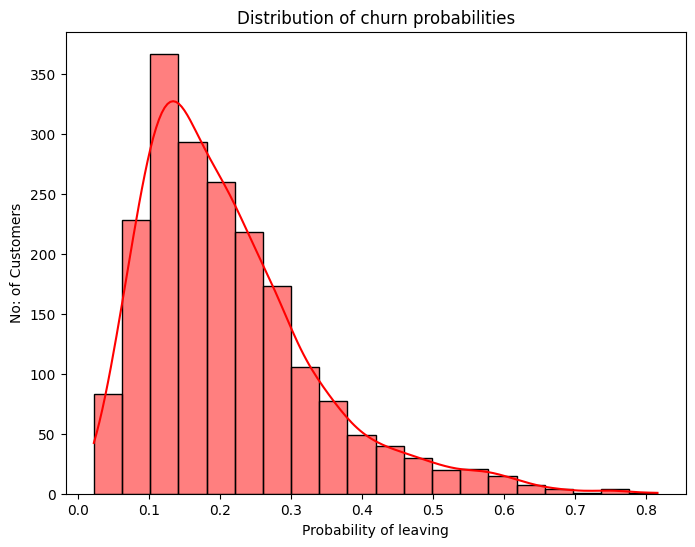

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 6))
sns.histplot(x_test_with_probabilities['leave_probability'], kde = True, bins = 20, color = 'red')
plt.title('Distribution of churn probabilities')
plt.xlabel('Probability of leaving')
plt.ylabel('No: of Customers')
plt.show()

**Problem Satement**

Identify customers who are likely to leave the bank.

**Dataset Understanding and Description**

This dataset is about people who have accounts at a certain bank, and that bank needs to know whether their customers will leave the bank. It has in total 14 columns and 100000 rows.

**Data Cleaning and Preparation**

Steps taken for data cleaning and Preparation :
  1. Data was complete, it had no missing values but a few of its columns had some other datatype but they were supposed to have boolean datatype, so that was changed.
  2. within Surname column it had some invalide names/values and were removed to ensure that data is undestandable and refraining from accurate insights.
  3. Dropped column "RowNumber" because the dataset already had a "CustomerId"  column to identify the customers uniquely.

**Exloratory Data Analysis**

Made a single chart to represent the Number of Churn Customers as per their probabilities of leaving by the model

**Model Training and Testing**

Model was Trained and tested using Python's scikit library.
80% of the data was used for training the model and remaining 20% was reserved for testing it.
Necessary Text fields were encoded so model can understand them, as i used linear Regression so it was necessary.

**Evaluation Metrics**

AFter model training was completed, model was put to be evaluated using Evaluation Metrics.
Evaluation Metrics that I used include accuracy_score, confusion_matrix, classification_model.


**Conclusion**

This task invloved cleaning data and then using that to train the model and predict if customers will churn the organization.

This task though looks small but the knowledge that it helps u gain is so helpful in the fields of Data.